<a href="https://colab.research.google.com/github/NikolaiZolotykh/MachineLearningCourse/blob/master/23_Corona_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset https://www.kaggle.com/code/gauravduttakiit/covid-19-sentiment-analysis-on-train-data/data 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import re
import nltk

In [11]:
url_train = 'https://raw.githubusercontent.com/NikolaiZolotykh/MachineLearningCourse/master/Corona_NLP_train.csv'
url_test  = 'https://raw.githubusercontent.com/NikolaiZolotykh/MachineLearningCourse/master/Corona_NLP_test.csv'

train = pd.read_csv(url_train, encoding='latin1')
test  = pd.read_csv(url_test, encoding='latin1')

In [12]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
train.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [14]:
LabelNames = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

In [15]:
train['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [16]:
train['OriginalTweet'][2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'

In [17]:
train['OriginalTweet'][4]

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [18]:
train['OriginalTweet'][41156]

"@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe"

In [19]:
train['OriginalTweet'][[0, 2, 4, 41156]]

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
2        Coronavirus Australia: Woolworths to give elde...
4        Me, ready to go at supermarket during the #COV...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, dtype: object

In [20]:
train['OriginalTweet'].dtype

dtype('O')

In [21]:
train['Sentiment'].dtype

dtype('O')

In [22]:
from pandas import CategoricalDtype
LabelDtype = CategoricalDtype(LabelNames, ordered=True)

train['Label'] = train['Sentiment'].astype(LabelDtype)
test ['Label'] = test ['Sentiment'].astype(LabelDtype)

In [23]:
# Lower casing
def lower(text):
    return text.lower()

train['Text'] = train['OriginalTweet'].apply(lambda x:lower(x))
test['Text']  =  test['OriginalTweet'].apply(lambda x:lower(x))

In [24]:
train['Text'][[0, 2, 4, 41156]]

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
2        coronavirus australia: woolworths to give elde...
4        me, ready to go at supermarket during the #cov...
41156    @tartiicat well new/used rift s are going for ...
Name: Text, dtype: object

In [25]:
#Remove Urls and HTML links
def remove_urls(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text)

train['Text'] = train['Text'].apply(lambda x:remove_urls(x))
test['Text']  =  test['Text'].apply(lambda x:remove_urls(x))

def remove_html(text):
  return re.sub(r'<.*?>', '', text)

train['Text'] = train['Text'].apply(lambda x:remove_html(x))
test['Text']  =  test['Text'].apply(lambda x:remove_html(x))

#Remove mentions, hashtags and &amp;
def remove_mention(x):
    return re.sub(r'@\w+','',x)

train['Text'] = train['Text'].apply(lambda x:remove_mention(x))
test['Text']  =  test['Text'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    return re.sub(r'#\w+','',x)

train['Text'] = train['Text'].apply(lambda x:remove_hash(x))
test['Text']  =  test['Text'].apply(lambda x:remove_hash(x))

def remove_amp(x):
    return re.sub(r'\&amp','',x)

train['Text'] = train['Text'].apply(lambda x:remove_amp(x))
test['Text']  =  test['Text'].apply(lambda x:remove_amp(x))

In [26]:
train['Text'][[0, 2, 4, 41156]]

0                                                and  and 
2        coronavirus australia: woolworths to give elde...
4        me, ready to go at supermarket during the  out...
41156     well new/used rift s are going for $700.00 on...
Name: Text, dtype: object

In [27]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    return re.sub(r'[^\w\s]', '', text)

train['Text'] = train['Text'].apply(lambda x:punct_remove(x))
test['Text']  =  test['Text'].apply(lambda x:punct_remove(x))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

train['Text'] = train['Text'].apply(lambda x:remove_stopwords(x))
test['Text']  = test['Text'].apply(lambda x:remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
len(stopwords.words('english'))

179

In [29]:
train['Text'][[0, 2, 4, 41156]]

0                                                         
2        coronavirus australia woolworths give elderly ...
4        ready go supermarket outbreak im paranoid food...
41156    well newused rift going 70000 amazon rn althou...
Name: Text, dtype: object

In [30]:
#Remove extra white space left while removing stuff
def remove_space(text):
    return re.sub(r"\s+"," ",text).strip()

train['Text'] = train['Text'].apply(lambda x:remove_space(x))
test['Text']  =  test['Text'].apply(lambda x:remove_space(x))

In [31]:
train['Text'][[0, 2, 4, 41156]]

0                                                         
2        coronavirus australia woolworths give elderly ...
4        ready go supermarket outbreak im paranoid food...
41156    well newused rift going 70000 amazon rn althou...
Name: Text, dtype: object

In [32]:
#Stemming 
from nltk.stem import PorterStemmer
  
def stemming(text):
    return ' '.join([PorterStemmer().stem(w) for w in text.split()])

train['Text'] = train['Text'].apply(lambda x:stemming(x))
test['Text']  =  test['Text'].apply(lambda x:stemming(x))

In [33]:
train['Text'][[0, 2, 4, 41156]]

0                                                         
2        coronaviru australia woolworth give elderli di...
4        readi go supermarket outbreak im paranoid food...
41156    well newus rift go 70000 amazon rn although no...
Name: Text, dtype: object

## Word cloud

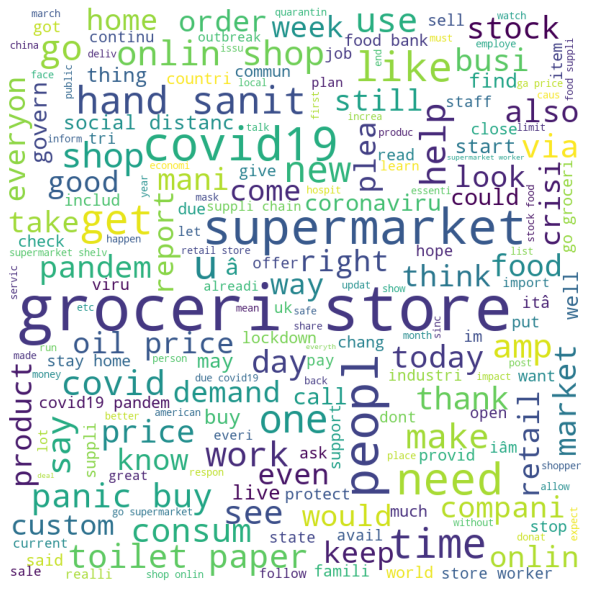

In [34]:
from wordcloud import WordCloud

text = " ".join(x for x in train['Text'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
                         
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

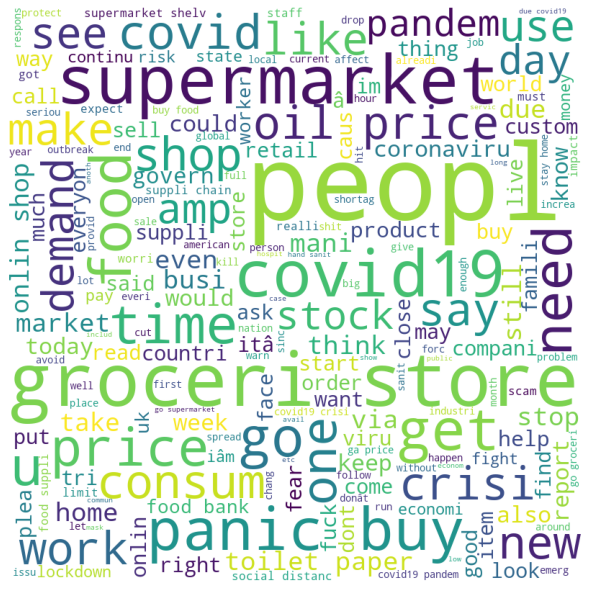

In [35]:
from wordcloud import WordCloud

text = " ".join(x for x in train['Text'][(train['Label'] == 'Negative') |
                                         (train['Label'] == 'Extremely Negative')])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
                         
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

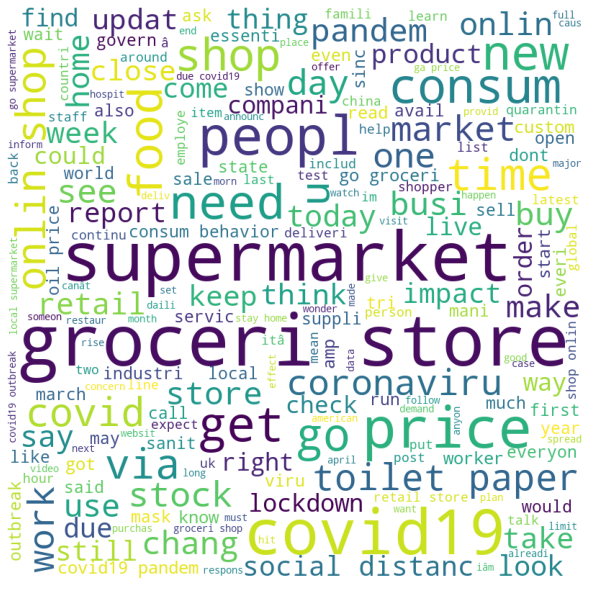

In [36]:
from wordcloud import WordCloud

text = " ".join(x for x in train['Text'][train['Label'] == 'Neutral'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
                         
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

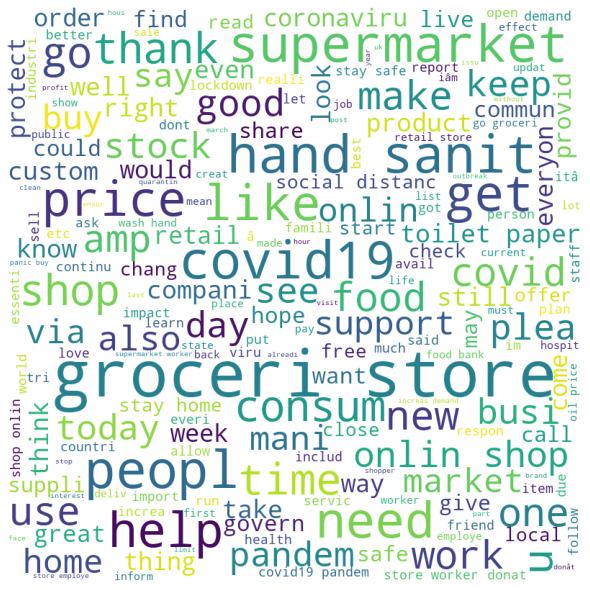

In [37]:
from wordcloud import WordCloud

text = " ".join(x for x in train['Text'][(train['Label'] == 'Positive') |
                                         (train['Label'] == 'Extremely Positive')])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
                         
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## Мера TF-IDF

$$
\text{TF-IDF} (t, d) = \text{TF} (t, d) \times \text{IDF} (t)
$$
где

- $\text{TF} (t, d)$ -- *частота слова* (term-frequency), т.е. частота встречаемости слова $t$ в документе $d$;
- $\text{IDF} (t) = \frac{1+N}{1+\text{DF} (t)} + 1$ -- *обратная частота документа* (inverse document-frequency), где $\text{DF} (t)$ -- количество документов, содержащих слово $t$. 

Множитель $\text{IDF} (t)$ нужен, чтобы снизить значение часто встречаемых слов. Возможны разные способы вычисления этого множителя. 

 В конце вектор $\text{TF-IDF} (t, d)$ для каждого $t$ нормализуется на евклидову норму по всем документам.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vectorizer = CountVectorizer(min_df=5)
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5)

X = vectorizer.fit_transform(train['Text'])
y = train['Label']

In [39]:
X.shape

(41157, 6902)

In [40]:
y.dtype

CategoricalDtype(categories=['Extremely Negative', 'Negative', 'Neutral', 'Positive',
                  'Extremely Positive'],
, ordered=True)

## Модели

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = 5)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [42]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.556552,0.005540
MultinomialNB,0.438200,0.006717
RandomForestClassifier,0.279685,0.001351


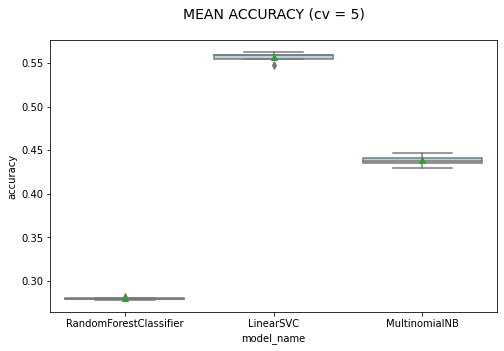

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
model = LinearSVC().fit(X_train, y_train)
y_train_pred = pd.Series(model.predict(X_train)).astype(LabelDtype)
y_test_pred  = pd.Series(model.predict(X_test)).astype(LabelDtype)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print(classification_report(y_test, y_test_pred, target_names = LabelNames))

                    precision    recall  f1-score   support

Extremely Negative       0.63      0.61      0.62       535
          Negative       0.64      0.68      0.66       671
           Neutral       0.53      0.50      0.52       987
          Positive       0.63      0.74      0.68       783
Extremely Positive       0.57      0.52      0.54      1140

          accuracy                           0.59      4116
         macro avg       0.60      0.61      0.60      4116
      weighted avg       0.59      0.59      0.59      4116



In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred, labels = LabelNames)
cm

array([[328, 166,  13,  23,   5],
       [152, 492, 153, 154,  36],
       [ 11,  81, 577,  96,  18],
       [ 24, 164, 157, 595, 200],
       [  6,  20,  13, 179, 453]])

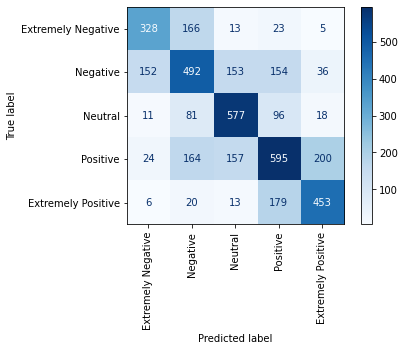

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=LabelNames)
cmd.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
pass